In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Remaining TASKS:
- Get external data of wheather, as wheather will affect energy consumption

In [2]:
# American Electric Power (AEP)
df = pd.read_csv("AEP_hourly.csv", parse_dates=['Datetime'], index_col='Datetime')
df.sort_index()
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [3]:
df.shape

(121273, 1)

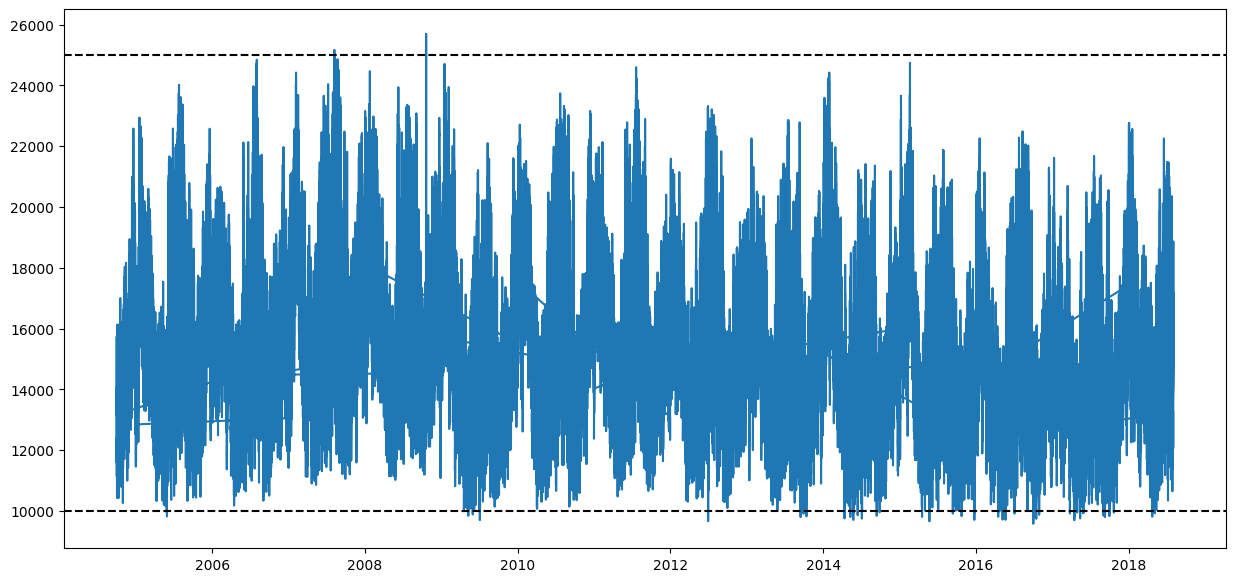

In [4]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(df)
ax.axhline(10000, color='Black', linestyle='--')
ax.axhline(25000, color='Black', linestyle='--')

**The 2 horizontal lines could be potential outliers that could be treated**

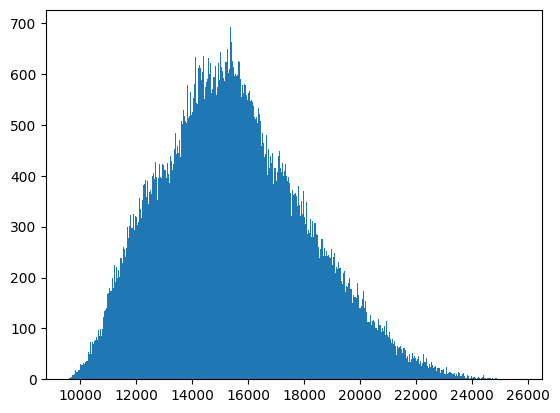

In [5]:
plt.hist(df, bins=500)
plt.show()

**The distribution is right skewed, there must have been some outliers**
   - The reason for such outlier could be sensor measuring error, etc. <br><br>
Still the outlier is not very prominent, hence we'll ignore for now

# Including External WEATHER DATA

In [6]:
weather = pd.read_csv(r'weatherData04-20.csv', parse_dates=True, index_col='Datetime')
weather.head()

,T2M,T2MWET,RH2M,WS10M,WS50M
Datetime,,,,,
2004-01-01 00:00:00,-1.05,-4.49,58.25,3.12,5.84
2004-01-01 01:00:00,-1.24,-4.42,60.94,2.88,5.48
2004-01-01 02:00:00,-2.44,-4.92,68.50,3.47,6.66
2004-01-01 03:00:00,-2.83,-4.94,73.00,4.22,8.02
2004-01-01 04:00:00,-2.74,-4.89,72.62,4.32,8.44


In [7]:
ad_df = pd.merge(df,weather,left_index=True,right_index=True)
ad_df

,AEP_MW,T2M,T2MWET,RH2M,WS10M,WS50M
Datetime,,,,,,
2004-10-01 01:00:00,12379.0,11.50,9.50,76.31,3.94,7.71
2004-10-01 02:00:00,11935.0,11.14,9.26,77.56,5.19,8.62
2004-10-01 03:00:00,11692.0,10.94,9.34,80.56,6.31,9.22
2004-10-01 04:00:00,11597.0,11.13,9.83,84.00,7.39,9.99
2004-10-01 05:00:00,11681.0,11.33,10.02,83.88,9.11,12.00
...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,24.31,20.15,59.69,6.06,9.85
2018-08-02 21:00:00,17303.0,23.65,20.02,63.62,5.90,9.55
2018-08-02 22:00:00,17001.0,23.08,19.80,66.50,5.72,9.25


# Train/Test Split

In [8]:
ad_df.index.max()

Timestamp('2018-08-03 00:00:00')

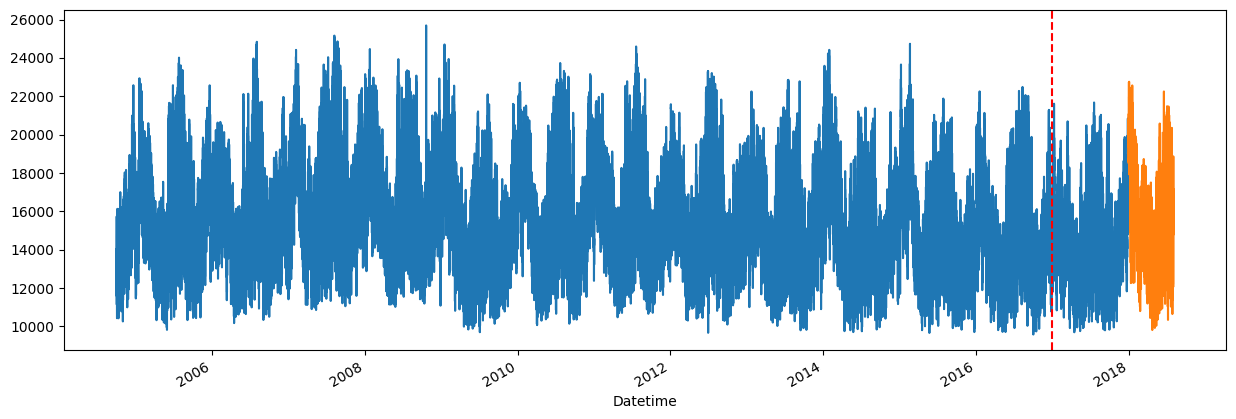

In [9]:
train = ad_df.loc[(ad_df.index.year < 2018)].sort_index()
test = ad_df.loc[(ad_df.index.year >= 2018)].sort_index()

#Plot
fig, ax = plt.subplots(1,1,figsize=(15,5))
train.AEP_MW.plot(ax=ax)
test.AEP_MW.plot(ax=ax)
ax.axvline('01-01-2017', color='Red', linestyle='--')

# Data Prep & Visualization

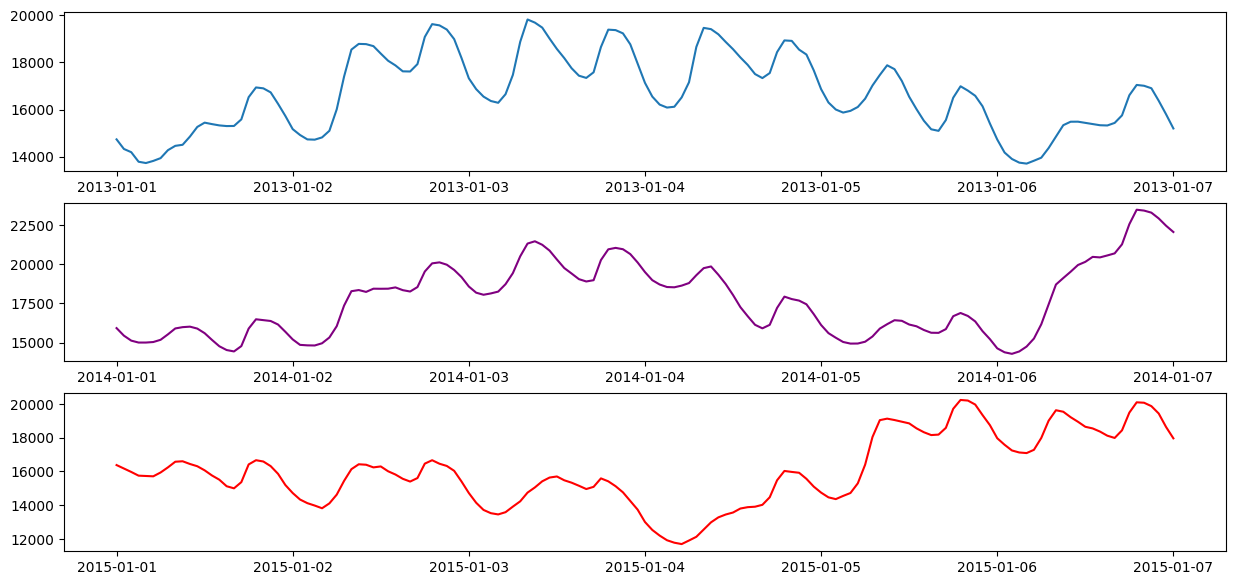

In [10]:
# A week data
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,7))
ax1.plot(ad_df.loc[((ad_df.index >= '01-01-2013') & (ad_df.index <= '01-07-2013')), 'AEP_MW'])
ax2.plot(ad_df.loc[((ad_df.index >= '01-01-2014') & (ad_df.index <= '01-07-2014')), 'AEP_MW'], color='purple')
ax3.plot(ad_df.loc[((ad_df.index >= '01-01-2015') & (ad_df.index <= '01-07-2015')), 'AEP_MW'], color='red')

- In a week the Trend is not evident, but the days have some seasonality, making an 'm' shapes
- With each week there is 2 peeks
    - 1 peek at morning and another at night
    - consumption being lowest after mid-night 
- There seems to be some similarity in the electricity consumption through out a week window.

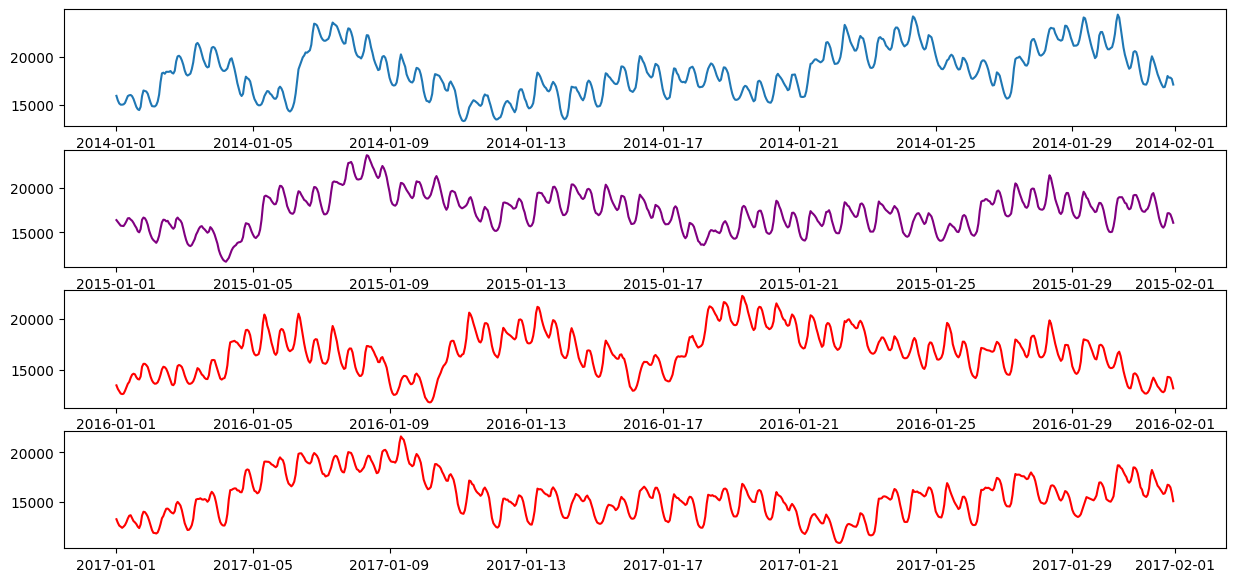

In [11]:
# A Month data
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,7))
ax1.plot(ad_df.loc[((ad_df.index.year == 2014) & (ad_df.index.month == 1)), 'AEP_MW'])
ax2.plot(ad_df.loc[((ad_df.index.year == 2015) & (ad_df.index.month == 1)), 'AEP_MW'], color='purple')
ax3.plot(ad_df.loc[((ad_df.index.year == 2016) & (ad_df.index.month == 1)), 'AEP_MW'], color='red')
ax4.plot(ad_df.loc[((ad_df.index.year == 2017) & (ad_df.index.month == 1)), 'AEP_MW'], color='red')

- Month has similarity between different years
- In a month itself there seems to be a seasonal component
- trend is not evident, high chance of being a stationary series

Text(0.5, 1.0, 'Year Data for Consumption')

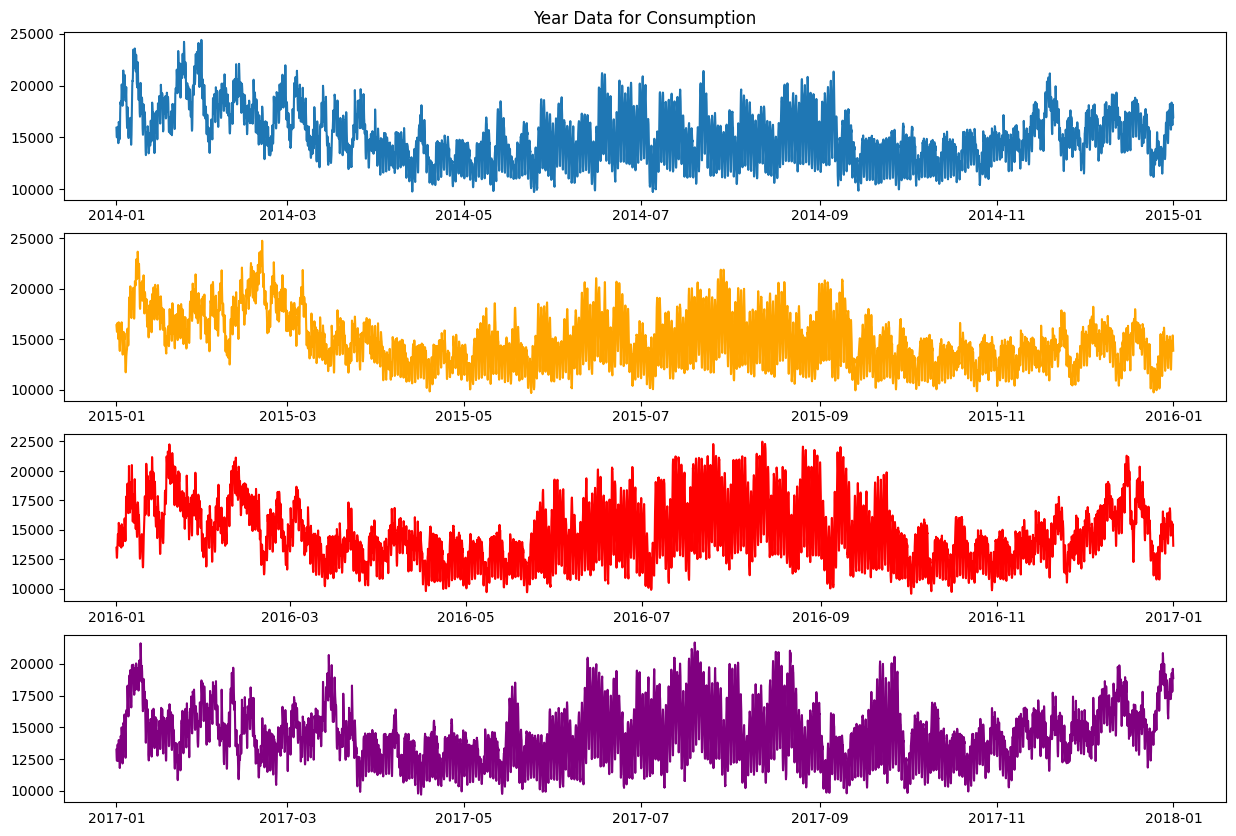

In [12]:
# A Year data for consumption
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,10))
ax1.plot(ad_df.loc[((ad_df.index.year == 2014)), 'AEP_MW'])
ax2.plot(ad_df.loc[((ad_df.index.year == 2015)), 'AEP_MW'], color='orange')
ax3.plot(ad_df.loc[((ad_df.index.year == 2016)), 'AEP_MW'], color='red')
ax4.plot(ad_df.loc[((ad_df.index.year == 2017)), 'AEP_MW'], color='purple')
ax1.set_title('Year Data for Consumption')

- Same as Month and Week, But Years have a higher similarities between them
- Q3 has very high fluctuations - In general, Q3 is a summer month in USA with warm to hot temperatures across most regions
    - Mostly AC consumption
    - Other factors include chilling drinks, refrigerators, cold stores and swimming pools

Text(0.5, 1.0, 'Year Data for Wet Bulb Temperature')

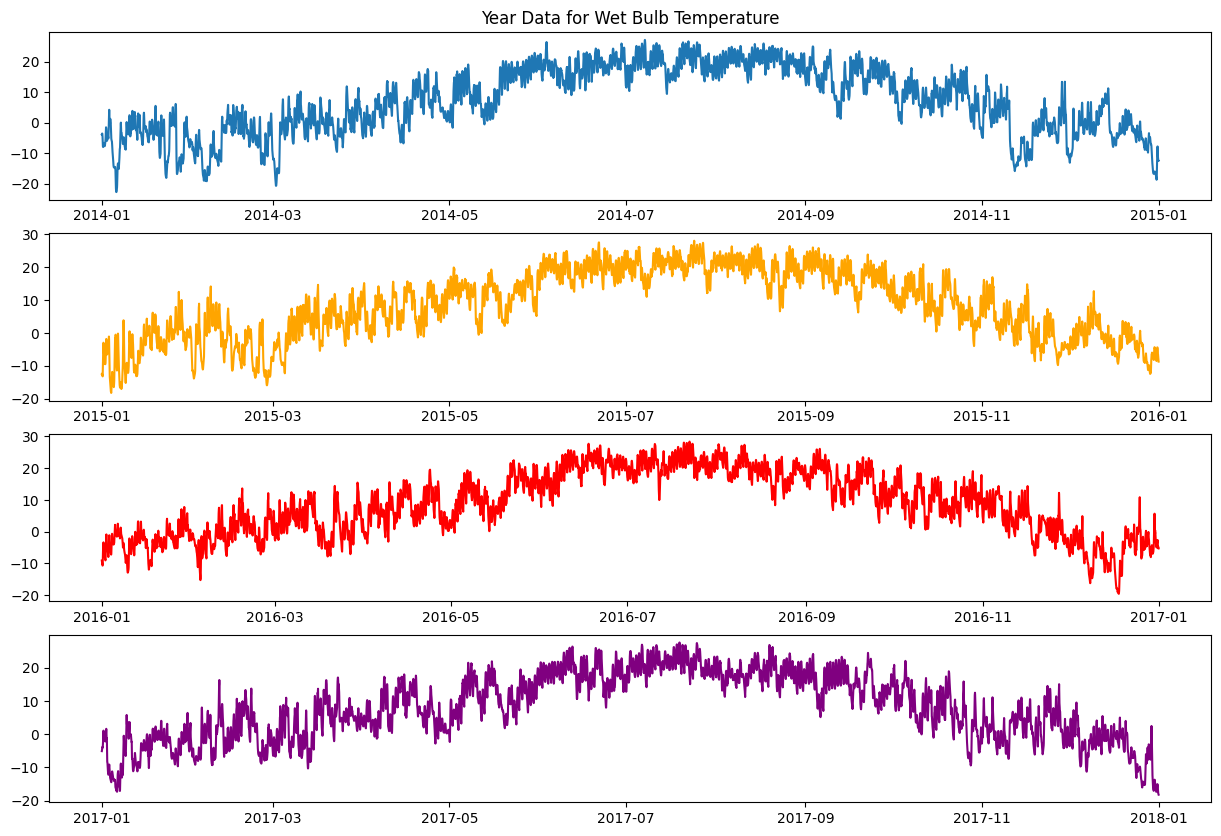

In [13]:
# A Year Data for Wet Bulb Temperature
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,10))
ax1.plot(ad_df.loc[((ad_df.index.year == 2014)), 'T2MWET'])
ax2.plot(ad_df.loc[((ad_df.index.year == 2015)), 'T2MWET'], color='orange')
ax3.plot(ad_df.loc[((ad_df.index.year == 2016)), 'T2MWET'], color='red')
ax4.plot(ad_df.loc[((ad_df.index.year == 2017)), 'T2MWET'], color='purple')
ax1.set_title('Year Data for Wet Bulb Temperature')

- We can see in Q3 the temperature peaks
- Also start and end of Jan and Dec resp., has lowest temp.

Text(0.5, 1.0, 'Year Data for Wind at 10 Meters - Q3')

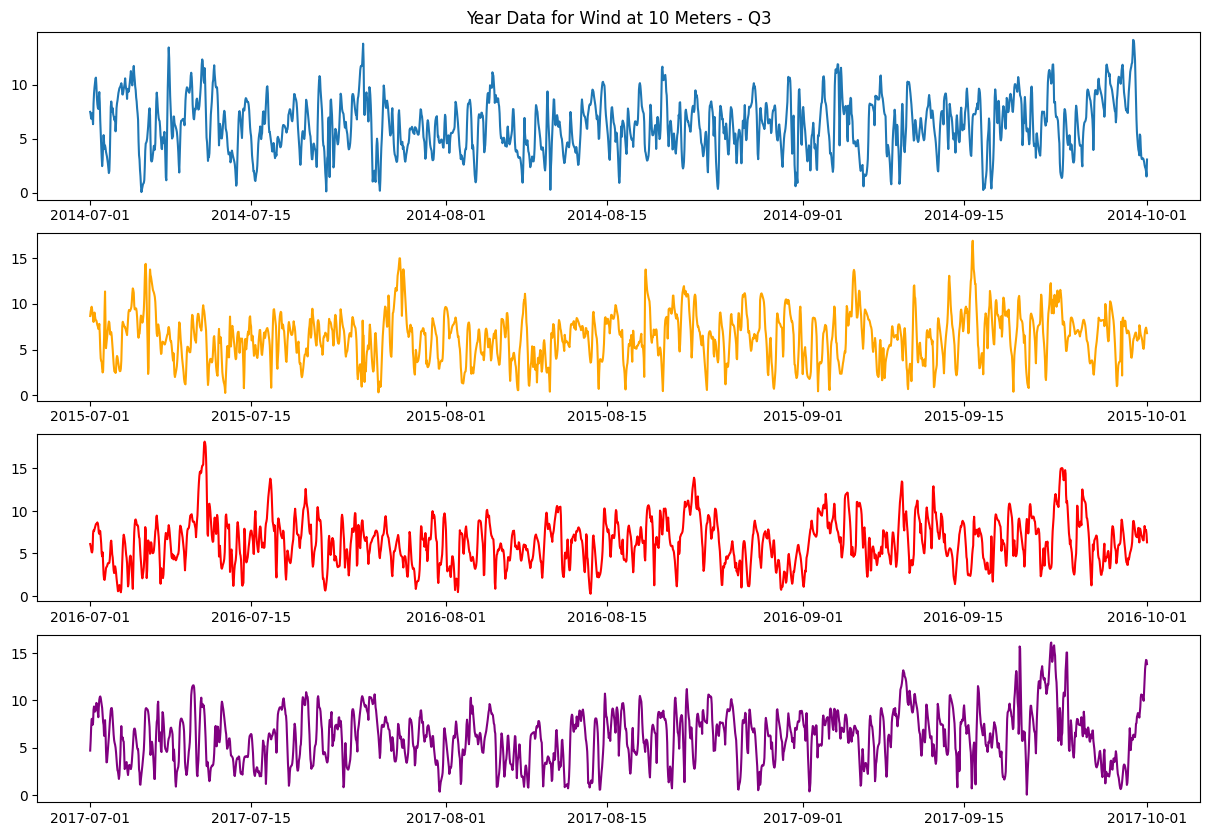

In [14]:
# A Year Data for Wind at 10 Meters - Q3
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,10))
ax1.plot(ad_df.loc[((ad_df.index.year == 2014) & (ad_df.index.month > 6) & (ad_df.index.month <= 9)), 'WS50M'])
ax2.plot(ad_df.loc[((ad_df.index.year == 2015) & (ad_df.index.month > 6) & (ad_df.index.month <= 9)), 'WS50M'], color='orange')
ax3.plot(ad_df.loc[((ad_df.index.year == 2016) & (ad_df.index.month > 6) & (ad_df.index.month <= 9)), 'WS50M'], color='red')
ax4.plot(ad_df.loc[((ad_df.index.year == 2017) & (ad_df.index.month > 6) & (ad_df.index.month <= 9)), 'WS50M'], color='purple')
ax1.set_title('Year Data for Wind at 10 Meters - Q3')

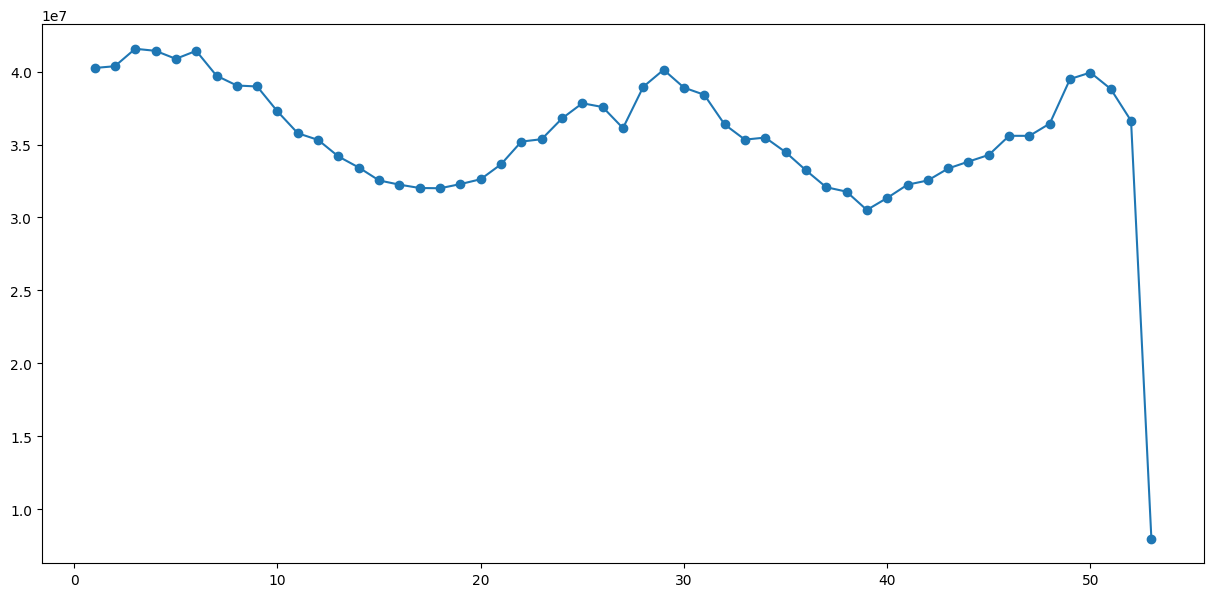

In [15]:
# Week data for all Years
fig, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(ad_df.AEP_MW.groupby(ad_df.index.isocalendar().week).sum(), marker = 'o')

- March and October has a deep <br>
<br>
(Most years have 52 weeks, but if the year starts on a Thursday or is a leap year that starts on a Wednesday, that particular year will have 53 numbered weeks)

In [16]:
ad_df.AEP_MW.groupby([ad_df.index.year, ad_df.index.isocalendar().week == 53]).count()

Datetime  week 
2004      False    2086
          True      120
2005      False    8710
          True       48
2006      False    8758
2007      False    8758
2008      False    8782
2009      False    8662
          True       96
2010      False    8685
          True       72
2011      False    8758
2012      False    8781
2013      False    8751
2014      False    8759
2015      False    8664
          True       96
2016      False    8712
          True       72
2017      False    8760
2018      False    5136
Name: AEP_MW, dtype: int64

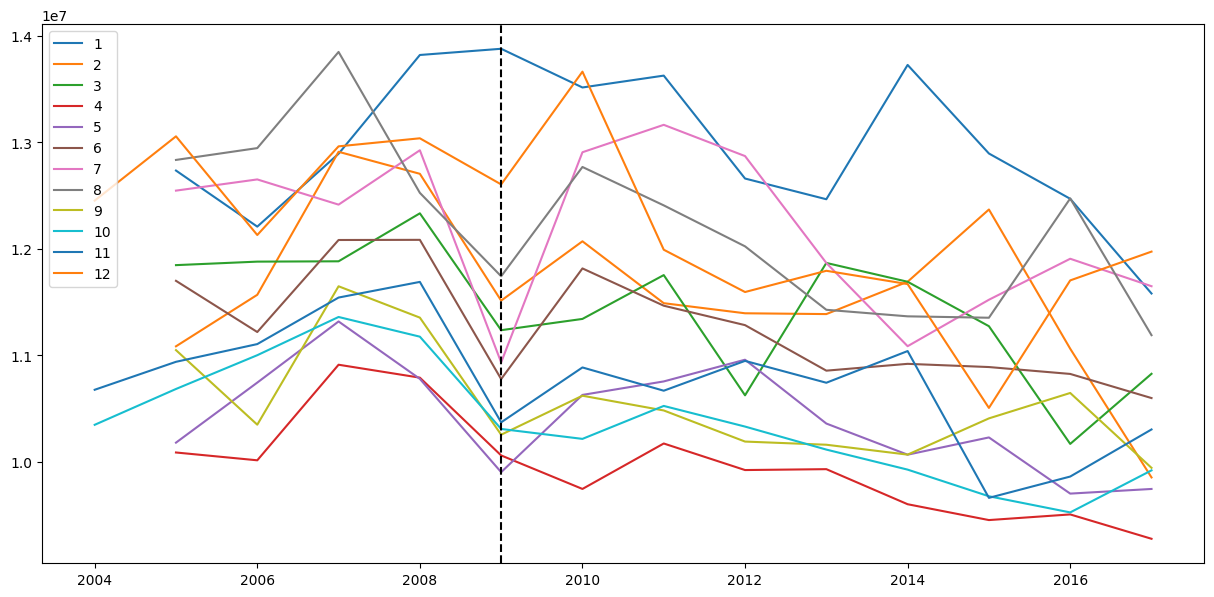

In [17]:
# Consumption throughout a year by month
fig, ax = plt.subplots(figsize=(15,7))
for i in range(1,13):
    plt.plot(ad_df.AEP_MW.loc[((ad_df.index.month == i) & (ad_df.index.year != 2018))]. \
             groupby(ad_df.loc[((ad_df.index.month == i) & (ad_df.index.year != 2018))].index.year).sum(), label=i)
plt.axvline(2009, ls='--', color='black')
plt.legend()

- Year 2009 had big dip in all months (becuase of 2008 Housing Financial crisis)

Text(0.5, 1.0, 'Correlation between Temperature of diff Year')

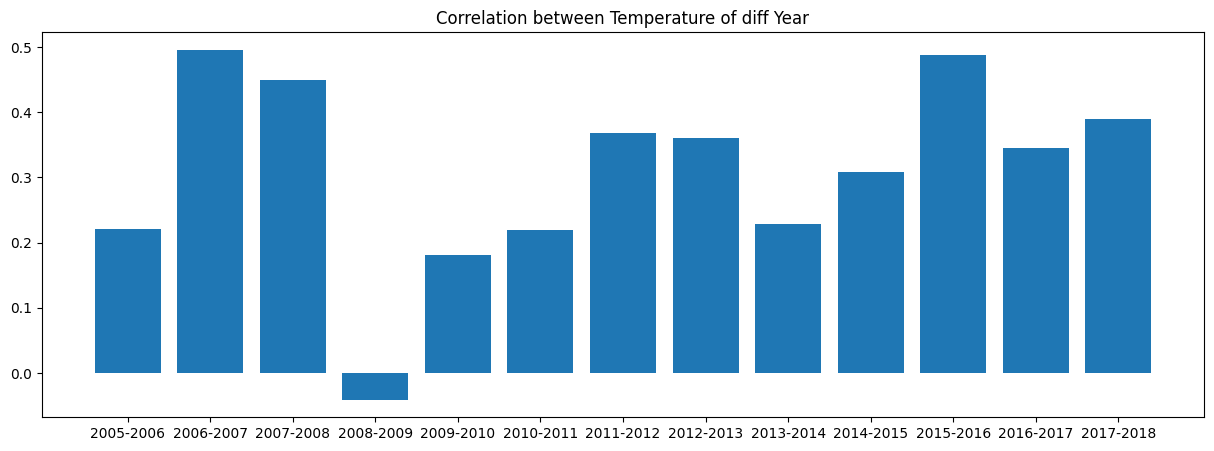

In [18]:
co_effs = {}
for i in range(ad_df.index.year.min()+1,ad_df.index.year.max()):
#     print(i, i+1)
    co_effs[str(i)+'-'+str(i+1)] = np.corrcoef(
        ad_df.loc[((ad_df.index.year == i) & (ad_df.index.month == 1)), 'T2M'],
        ad_df.loc[((ad_df.index.year == i+1) & (ad_df.index.month == 1)), 'T2M']
    )[0][1]
    i+=1
co_effs = pd.DataFrame.from_dict(co_effs, orient='index', columns=['values'])
plt.figure(figsize=(15,5))
plt.bar(co_effs.index, co_effs['values'])
plt.title('Correlation between Temperature of diff Year')

# Feature Creation

In [19]:
def create_features(data):
    '''
    This will create relevant features from index column
    '''
    temp = data.copy()
    temp['month'] = temp.index.month
    temp['quarter'] = temp.index.quarter
    temp['year'] = temp.index.year
    temp['day'] = temp.index.day
    temp['dayofweek'] = temp.index.day_of_week
    temp['dayofyear'] = temp.index.dayofyear
    temp['hour_grp'] = temp.apply(lambda row: np.ceil(row.name.hour/6).astype('int8') if (row.name.hour/6) else 1, axis=1) # 6 hours group; total 4 group in a day
    temp['weekofyear'] = temp.index.isocalendar().week.astype('int')
    return temp

In [20]:
ad_df = create_features(ad_df)
ad_df

,AEP_MW,T2M,T2MWET,RH2M,WS10M,WS50M,month,quarter,year,day,dayofweek,dayofyear,hour_grp,weekofyear
Datetime,,,,,,,,,,,,,,
2004-10-01 01:00:00,12379.0,11.50,9.50,76.31,3.94,7.71,10,4,2004,1,4,275,1,40
2004-10-01 02:00:00,11935.0,11.14,9.26,77.56,5.19,8.62,10,4,2004,1,4,275,1,40
2004-10-01 03:00:00,11692.0,10.94,9.34,80.56,6.31,9.22,10,4,2004,1,4,275,1,40
2004-10-01 04:00:00,11597.0,11.13,9.83,84.00,7.39,9.99,10,4,2004,1,4,275,1,40
2004-10-01 05:00:00,11681.0,11.33,10.02,83.88,9.11,12.00,10,4,2004,1,4,275,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,24.31,20.15,59.69,6.06,9.85,8,3,2018,2,3,214,4,31
2018-08-02 21:00:00,17303.0,23.65,20.02,63.62,5.90,9.55,8,3,2018,2,3,214,4,31
2018-08-02 22:00:00,17001.0,23.08,19.80,66.50,5.72,9.25,8,3,2018,2,3,214,4,31


## Build Lag features
**Lag Features are build on Target column, Lag Feature is what was the Target (x) days in the past**

### FORECASTING HORIZON
Before building Lag feature, be sure to understand Forcasting horizon. <br>
Say at any given point you want to forecast 1 year ahead, and no more than that. <br>
In that case we can build 1 year lag feature, or 2 year, etc. <br>
But if your Forecasting horizon could be of 2 years then you can build 2 year lag feature, 3 year, etc. <br> 
<br>
**<font color='Green'>REMEMBER: Lag feature year (or month,days,etc.) >= Forecasting Horizon</font>** <br>
<br>
**Ex:** When you have Forecasting Horizon of 2 year, you can't build Lag1 (1 year lag feature), <br>
    This is because when forecasting for 2nd year, the model will not have access to Lag1 feature, becuase it could not be computed. <br>
    Say you have training data till 2016, and you want to forecast for 2017 and 2018, then in that case 2017 will have Lag1 feature computed from 2016, but for 2018, you can't compute Lag1, becuase that could mean you have Target coulumn available for 2017, which can't be possible (and ofcourse you don't wanna make Lag1 for 2018 from the forecasted value of 2017)

<br>
Also to remember the higher the Forecasting Horizon the more unrealiable the forecasting can become. Of course! <br>

**Say for this case we have a Forcasting Horizon of 1 year** <br>
hence we can make Lag1, lag2, ...

In [21]:
def create_lag(data):
    '''
    This will create Lag features (of Target column)
    '''
    target_map = data.AEP_MW.to_dict()
    temp = data.copy()
    
    # Let's make Lag for 3 years
    temp['Lag1'] = (temp.index - pd.Timedelta('364 days')).map(target_map)  #365
    temp['Lag2'] = (temp.index - pd.Timedelta('728 days')).map(target_map)  #730
    temp['Lag3'] = (temp.index - pd.Timedelta('1092 days')).map(target_map) #1092
    # 364 days instead of 365 for a year is a little trick, becuase it is divisible by 7: 364/7 = 52, 
    # it will give us exact same day of the week as past. So we don't need to worry about 
    # mapping the days of the weeks into the past.
    
    return temp

In [22]:
ad_df = create_lag(ad_df)
ad_df.tail()

,AEP_MW,T2M,T2MWET,RH2M,WS10M,WS50M,month,quarter,year,day,dayofweek,dayofyear,hour_grp,weekofyear,Lag1,Lag2,Lag3
Datetime,,,,,,,,,,,,,,,,,
2018-08-02 20:00:00,17673.0,24.31,20.15,59.69,6.06,9.85,8,3,2018,2,3,214,4,31,18705.0,20140.0,16078.0
2018-08-02 21:00:00,17303.0,23.65,20.02,63.62,5.90,9.55,8,3,2018,2,3,214,4,31,18108.0,19616.0,15908.0
2018-08-02 22:00:00,17001.0,23.08,19.80,66.50,5.72,9.25,8,3,2018,2,3,214,4,31,17544.0,19246.0,15783.0
2018-08-02 23:00:00,15964.0,22.61,19.58,68.56,5.56,8.91,8,3,2018,2,3,214,4,31,16262.0,17943.0,14808.0
2018-08-03 00:00:00,14809.0,22.12,19.33,70.56,5.39,8.65,8,3,2018,3,4,215,1,31,15045.0,16491.0,13669.0


# Visualize Feature to Target Relationship

Text(0.5, 1.0, 'Consumption by Month')

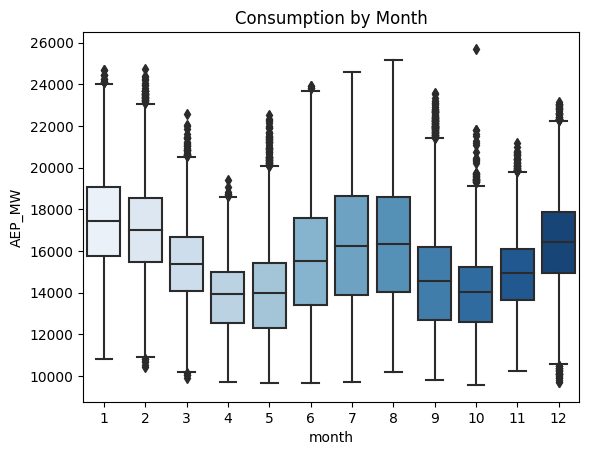

In [23]:
sns.boxplot(x=ad_df.month, y=ad_df.AEP_MW, palette='Blues')
plt.title('Consumption by Month')

- Most months have sudden high consumptions (outliers)
- Month 6,7,8 have high distribution, also we have seen previously, this are the months (Q3) have higher fluctuation

Text(0.5, 1.0, 'Consumption by Hour Group')

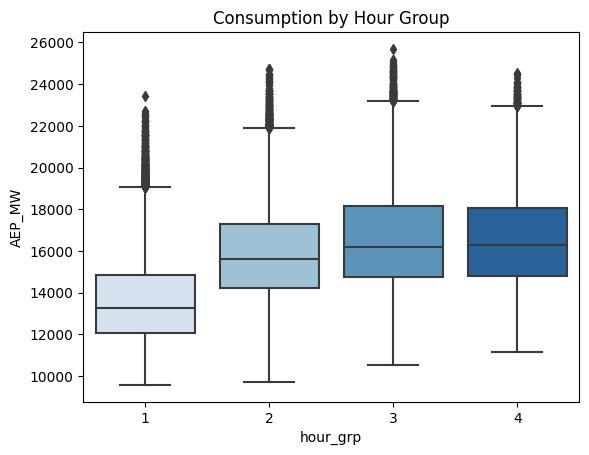

In [24]:
sns.boxplot(x=ad_df.hour_grp, y=ad_df.AEP_MW, palette='Blues')
plt.title('Consumption by Hour Group')

- In every hour group, some hour(s) have very high consumption

# Cross Validation (for Time series)

In [25]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)

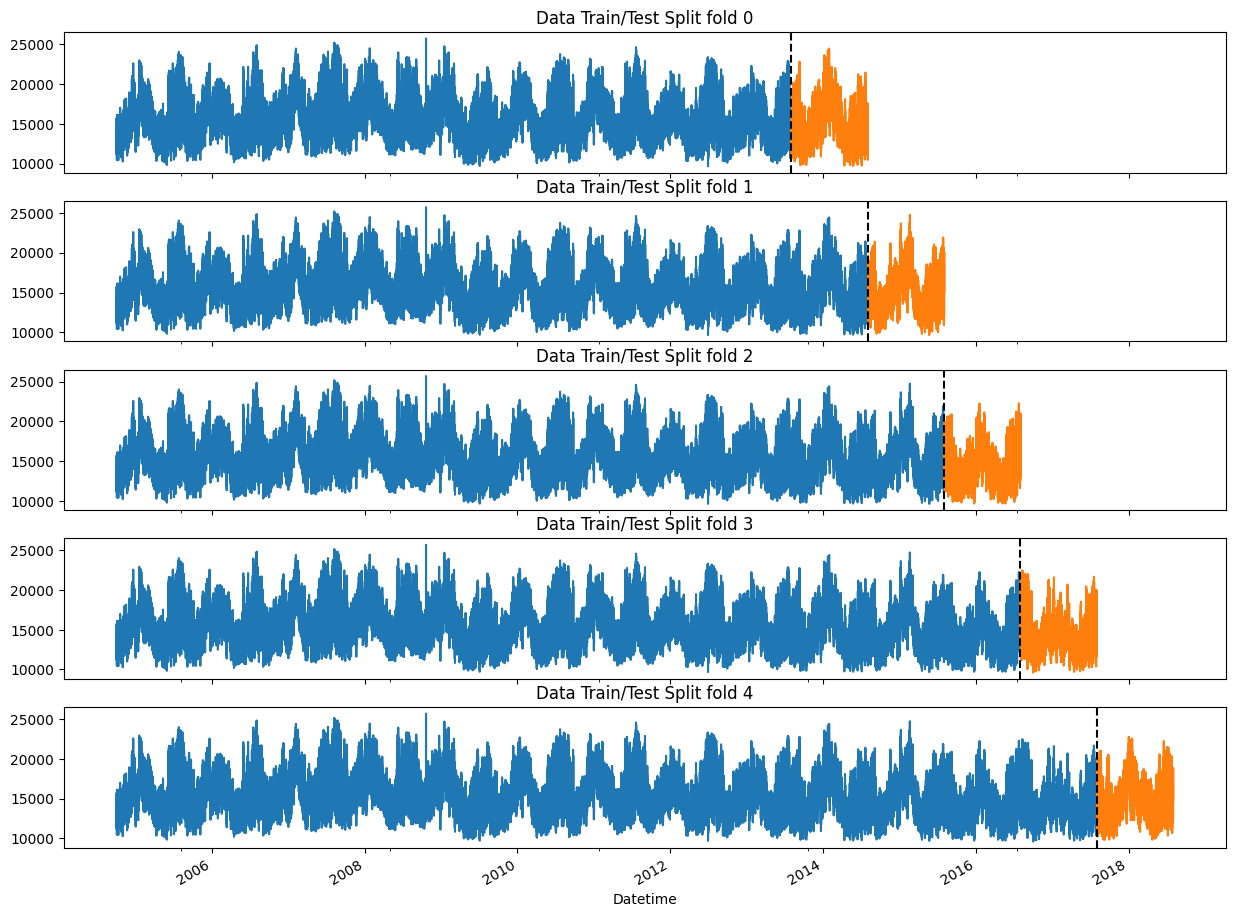

In [26]:
fig, ax = plt.subplots(5,1, figsize=(15,12), sharex=True)

fold = 0
for train_idx, test_idx in tss.split(ad_df):
    train = ad_df.iloc[train_idx]
    test = ad_df.iloc[test_idx]
    
    #plot
    train.AEP_MW.plot(ax=ax[fold], label='Training Set', title=f'Data Train/Test Split fold {fold}')
    test.AEP_MW.plot(ax=ax[fold], label='Validation Set')
    ax[fold].axvline(train.index.max(), color='black', linestyle='--')
    
    fold+=1
plt.show()

# XGBoost MODEL

In [27]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

### Train using Cross-Validation

In [32]:
preds = []
scores = []
errors = []
for train_idx, test_idx in tss.split(ad_df):
    train = ad_df.iloc[train_idx]
    test = ad_df.iloc[test_idx]
    
    # Split
    X_train = train.drop('AEP_MW', axis=1)
    y_train = train['AEP_MW']
    
    X_test = test.drop('AEP_MW', axis=1)
    y_test = test['AEP_MW']
    
    # Model
    model = XGBRegressor(n_estimators=4000, eta=0.001, gamma=10)
    model.set_params(eval_metric='rmse', early_stopping_rounds=100)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], verbose=1000)

    #Pred
    y_pred = model.predict(X_test)
    preds.append(y_pred)
    
    #scores
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(rmse)
    mape = np.round(mean_absolute_percentage_error(y_test, y_pred)*100,2)
    errors.append(mape)

[0]	validation_0-rmse:16040.95452	validation_1-rmse:15402.56977
[1000]	validation_0-rmse:6059.45417	validation_1-rmse:5823.87351
[2000]	validation_0-rmse:2550.02247	validation_1-rmse:2603.60089
[3000]	validation_0-rmse:1483.10789	validation_1-rmse:1754.39422
[3999]	validation_0-rmse:1222.69590	validation_1-rmse:1584.15351
[0]	validation_0-rmse:15977.45653	validation_1-rmse:15359.49152
[1000]	validation_0-rmse:6038.29572	validation_1-rmse:5855.83122
[2000]	validation_0-rmse:2551.55114	validation_1-rmse:2587.47459
[3000]	validation_0-rmse:1496.84506	validation_1-rmse:1655.36842
[3999]	validation_0-rmse:1239.37154	validation_1-rmse:1462.04842
[0]	validation_0-rmse:15920.75244	validation_1-rmse:14686.53098
[1000]	validation_0-rmse:6017.66705	validation_1-rmse:5222.95499
[2000]	validation_0-rmse:2549.91220	validation_1-rmse:2101.41621
[3000]	validation_0-rmse:1507.79112	validation_1-rmse:1500.64603
[3431]	validation_0-rmse:1355.52994	validation_1-rmse:1483.55531
[0]	validation_0-rmse:15820.

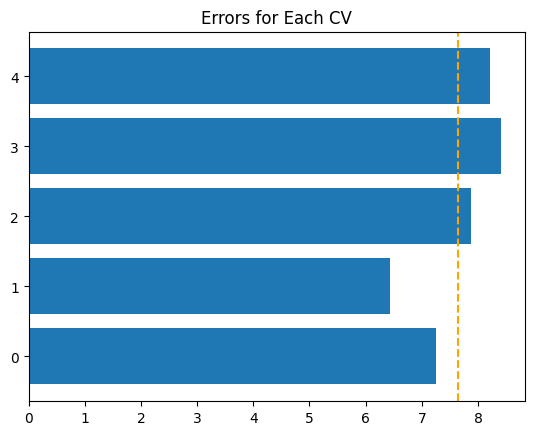

In [82]:
plt.barh(range(len(errors)), errors)
plt.axvline(np.mean(errors), color='orange', linestyle='--')
plt.title('Errors for Each CV')
plt.show()

In [83]:
print("RMSE:", np.mean(scores))
print("MAPE:", np.mean(errors))

1612.3955292370974

- The Average `RMSE` is pretty impressive - the 95% confidence interval is y_pred +- 1600 :)
- Average `MAPE` of 7.6% is impressive, improvement from previous error of 8.5% - We are just ~7.6% off from actuals :)

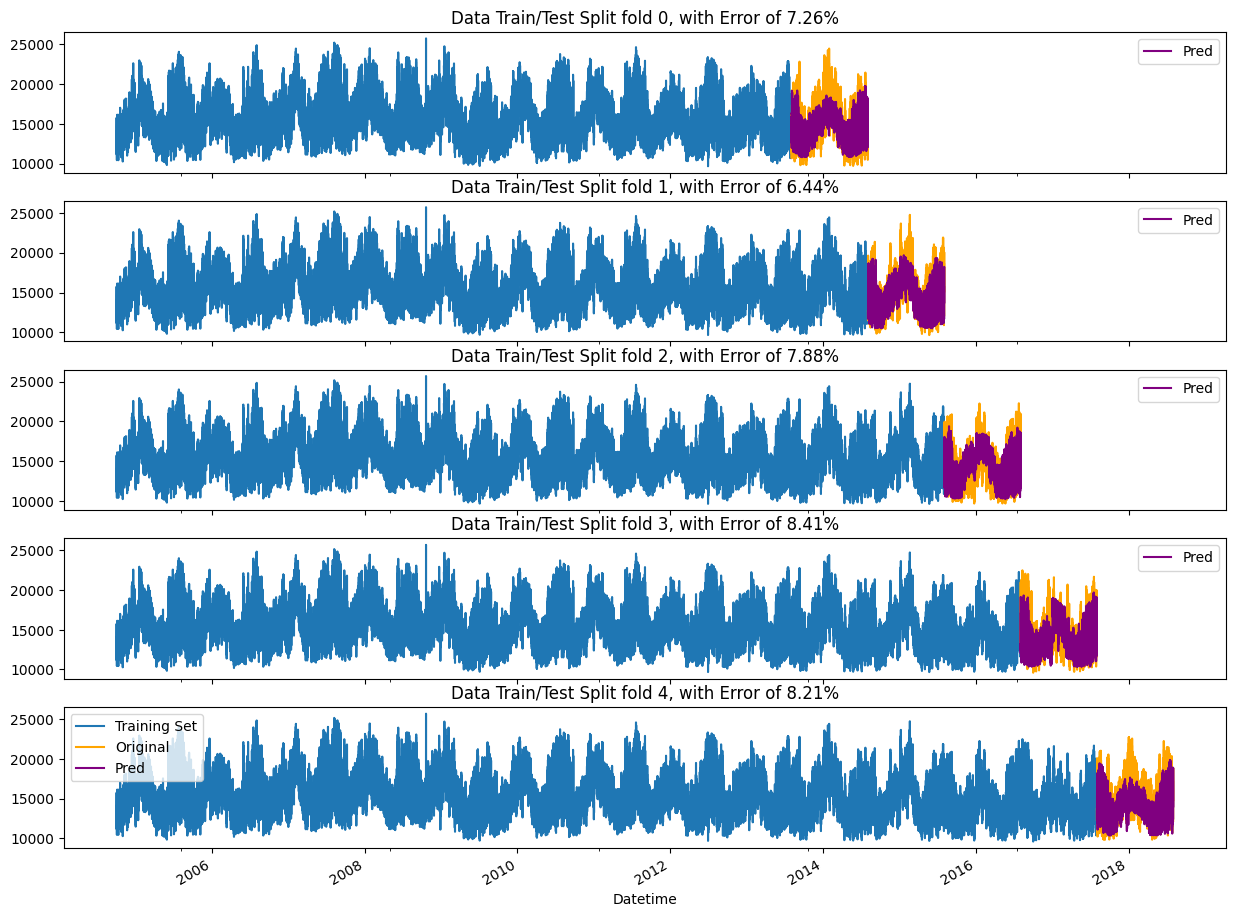

In [77]:
fig, ax = plt.subplots(5,1, figsize=(15,12), sharex=True)

fold = 0
for train_idx, test_idx in tss.split(ad_df):
    train = ad_df.iloc[train_idx]
    test = ad_df.iloc[test_idx]
    
    # Adjust index for Pred
    pred_df = pd.DataFrame(preds[fold], columns=['Pred'])
    pred_df.index = test.index
    
    #plot
    train.AEP_MW.plot(ax=ax[fold], label='Training Set', 
                      title=f'Data Train/Test Split fold {fold}, with Error of {errors[fold]}%')
    test.AEP_MW.plot(ax=ax[fold], label='Original', color='orange')
    pred_df.plot(ax=ax[fold], label='Prediction', color='purple')
    
    fold+=1
plt.legend()
plt.show()

## Model
**Training on whole data**

In [80]:
X = ad_df.drop('AEP_MW', axis=1)
y = ad_df.AEP_MW

In [81]:
model = XGBRegressor(n_estimators=5000, eta=0.001, gamma=1) # Impirically noticed the tree could go above 5000
model.set_params(eval_metric='rmse', early_stopping_rounds=100)
model.fit(X, y, eval_set=[(X, y)], verbose=1000)

[0]	validation_0-rmse:15698.53098
[1000]	validation_0-rmse:5943.96385
[2000]	validation_0-rmse:2546.58157
[3000]	validation_0-rmse:1544.46880
[4000]	validation_0-rmse:1298.87988
[4999]	validation_0-rmse:1222.21994


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=100,
             enable_categorical=False, eta=0.001, eval_metric='rmse',
             feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

- `RMSE` on the Dataset is at ~1200, which is pretty good 

<AxesSubplot: >

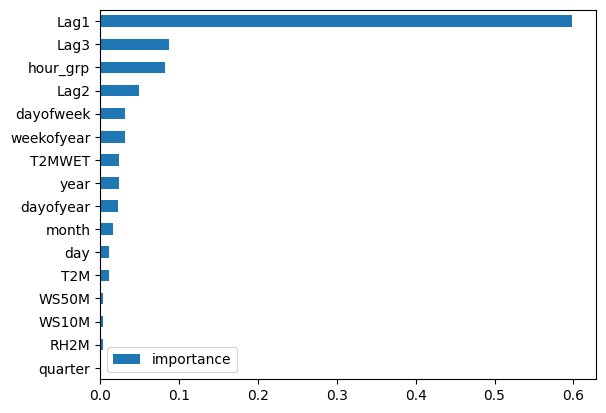

In [90]:
pd.DataFrame(data=model.feature_importances_, 
             index=model.feature_names_in_,
             columns = ['importance']
            ).sort_values(by='importance').plot(kind='barh')

- Lag Features, hour_grp has highest importance
- quater has no importance
- There could be Multicollinearity though

<AxesSubplot: >

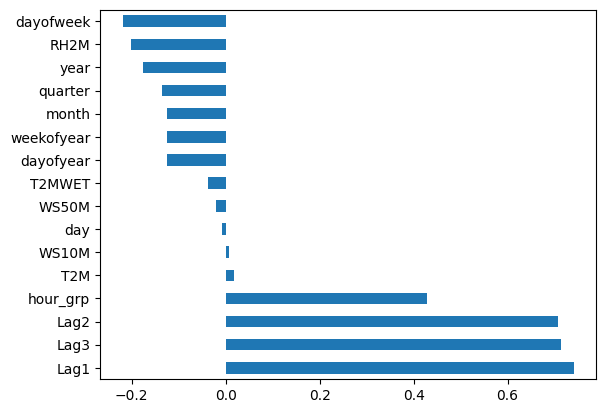

In [107]:
# Correlation with Target
ad_df.corr()['AEP_MW'].sort_values(ascending=False)[1:].plot(kind='barh')

<AxesSubplot: >

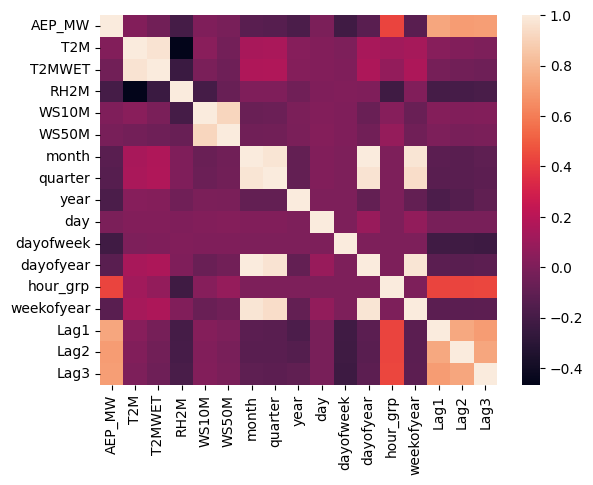

In [112]:
# Correlation with Target
corr = ad_df.corr()
sns.heatmap(corr)

- We might want to drop some freatures with highest correlation

### Predict the future

In [114]:
ad_df.index.date.max() 

datetime.date(2018, 8, 3)

In [154]:
ad_df.index.date.max() + pd.Timedelta('364 days')

datetime.date(2019, 8, 2)

In [161]:
# Create Future Dates
org_df = ad_df.copy()
start = org_df.index.date.max()
end = org_df.index.date.max() + pd.Timedelta('363 days')
future_df = pd.DataFrame(index = pd.date_range(start=start, end=end, freq='1H'))

# Add wheather features
future_df = pd.merge(future_df,weather,left_index=True,right_index=True)

# Concat the future_df to orginal df to compute Lag Features
future_df['isFuture'] = True
org_df['isFuture'] = False
org_and_future = pd.concat([org_df,future_df], axis=0)
org_and_future

,AEP_MW,T2M,T2MWET,RH2M,WS10M,WS50M,month,quarter,year,day,dayofweek,dayofyear,hour_grp,weekofyear,Lag1,Lag2,Lag3,isFuture
2004-10-01 01:00:00,12379.0,11.50,9.50,76.31,3.94,7.71,10.0,4.0,2004.0,1.0,4.0,275.0,1.0,40.0,NaN,NaN,NaN,False
2004-10-01 02:00:00,11935.0,11.14,9.26,77.56,5.19,8.62,10.0,4.0,2004.0,1.0,4.0,275.0,1.0,40.0,NaN,NaN,NaN,False
2004-10-01 03:00:00,11692.0,10.94,9.34,80.56,6.31,9.22,10.0,4.0,2004.0,1.0,4.0,275.0,1.0,40.0,NaN,NaN,NaN,False
2004-10-01 04:00:00,11597.0,11.13,9.83,84.00,7.39,9.99,10.0,4.0,2004.0,1.0,4.0,275.0,1.0,40.0,NaN,NaN,NaN,False
2004-10-01 05:00:00,11681.0,11.33,10.02,83.88,9.11,12.00,10.0,4.0,2004.0,1.0,4.0,275.0,1.0,40.0,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31 20:00:00,NaN,26.71,24.18,73.75,5.46,7.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2019-07-31 21:00:00,NaN,25.58,23.78,80.38,5.46,7.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2019-07-31 22:00:00,NaN,24.58,23.23,84.69,5.37,6.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2019-07-31 23:00:00,NaN,23.76,22.60,86.81,5.00,6.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [162]:
# Create Date Features and Lag Features
# Weather features has been added above
org_and_future = create_features(org_and_future)
org_and_future = create_lag(org_and_future)
org_and_future

,AEP_MW,T2M,T2MWET,RH2M,WS10M,WS50M,month,quarter,year,day,dayofweek,dayofyear,hour_grp,weekofyear,Lag1,Lag2,Lag3,isFuture
2004-10-01 01:00:00,12379.0,11.50,9.50,76.31,3.94,7.71,10,4,2004,1,4,275,1,40,NaN,NaN,NaN,False
2004-10-01 02:00:00,11935.0,11.14,9.26,77.56,5.19,8.62,10,4,2004,1,4,275,1,40,NaN,NaN,NaN,False
2004-10-01 03:00:00,11692.0,10.94,9.34,80.56,6.31,9.22,10,4,2004,1,4,275,1,40,NaN,NaN,NaN,False
2004-10-01 04:00:00,11597.0,11.13,9.83,84.00,7.39,9.99,10,4,2004,1,4,275,1,40,NaN,NaN,NaN,False
2004-10-01 05:00:00,11681.0,11.33,10.02,83.88,9.11,12.00,10,4,2004,1,4,275,1,40,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31 20:00:00,NaN,26.71,24.18,73.75,5.46,7.30,7,3,2019,31,2,212,4,31,16579.0,18495.0,20026.0,True
2019-07-31 21:00:00,NaN,25.58,23.78,80.38,5.46,7.08,7,3,2019,31,2,212,4,31,16457.0,17771.0,19529.0,True
2019-07-31 22:00:00,NaN,24.58,23.23,84.69,5.37,6.91,7,3,2019,31,2,212,4,31,16197.0,17220.0,19029.0,True
2019-07-31 23:00:00,NaN,23.76,22.60,86.81,5.00,6.35,7,3,2019,31,2,212,4,31,15259.0,16100.0,17790.0,True


In [169]:
# Split the Future data from Original again
future_df_new = org_and_future.query('isFuture').copy()
future_df_new.drop(['AEP_MW', 'isFuture'], axis=1, inplace=True)
future_df_new.head()

,T2M,T2MWET,RH2M,WS10M,WS50M,month,quarter,year,day,dayofweek,dayofyear,hour_grp,weekofyear,Lag1,Lag2,Lag3
2018-08-03 00:00:00,22.12,19.33,70.56,5.39,8.65,8,3,2018,3,4,215,1,31,15045.0,16491.0,13669.0
2018-08-03 01:00:00,21.70,19.07,71.88,5.57,8.93,8,3,2018,3,4,215,1,31,13940.0,15319.0,12772.0
2018-08-03 02:00:00,21.49,18.87,71.94,6.35,9.68,8,3,2018,3,4,215,1,31,13230.0,14492.0,12253.0
2018-08-03 03:00:00,21.21,18.64,72.38,6.72,10.30,8,3,2018,3,4,215,1,31,12624.0,13945.0,11928.0
2018-08-03 04:00:00,20.99,18.40,72.19,6.84,10.27,8,3,2018,3,4,215,1,31,12410.0,13619.0,11696.0


In [172]:
future_pred = model.predict(future_df_new)
future_pred

array([14059.499, 13213.711, 12747.807, ..., 17487.867, 16891.6  ,
       14289.288], dtype=float32)

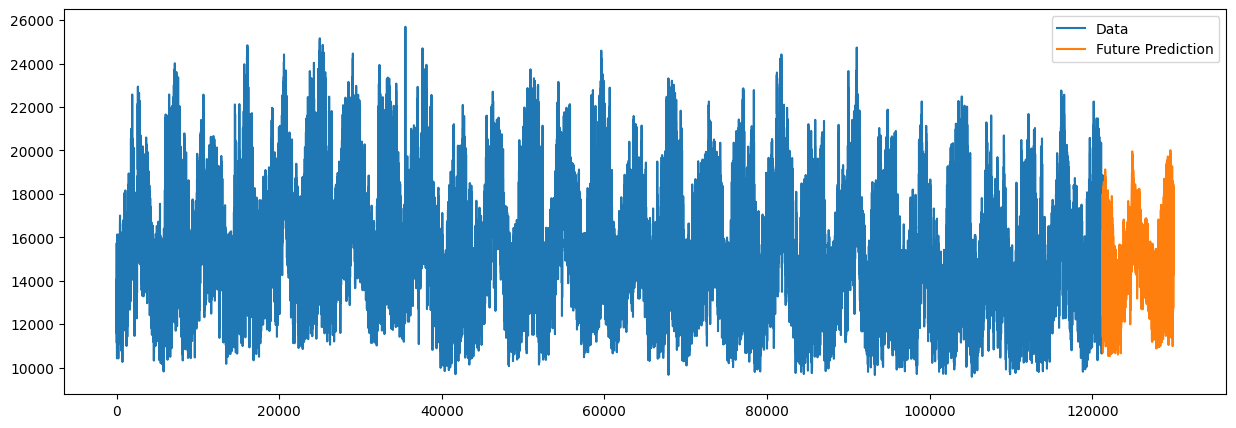

In [210]:
# Plot
fig, ax = plt.subplots(1,1,figsize=(15,5))
test = np.concatenate((y,future_pred))
test = pd.DataFrame(test)
plt.plot(test.iloc[:y.shape[0]], label='Data')
plt.plot(test.iloc[y.shape[0]:], label='Future Prediction')
plt.legend()